# Linear Sequential Estimation

In [16]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)

In [17]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

import requests
url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
r = requests.get(url)

# Store the file to the colab working directory
with open('plot_utility.py', 'w') as f:
    f.write(r.text)

# import the function we want from that file
from plot_utility import plot_tme

# Generate sample time series data

In [18]:
t = np.linspace(0, 6, 500)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Add some normal (gaussian) noise

In [19]:
# Example for Gaussian (normal) random variable

noise_mean = 0
noise_std = 0.5

v = np.column_stack(np.random.normal(noise_mean, noise_std, len(y))).T

In [20]:
y_tilde = y+v

# Plotting

<Axes: xlabel='Time', ylabel='y'>

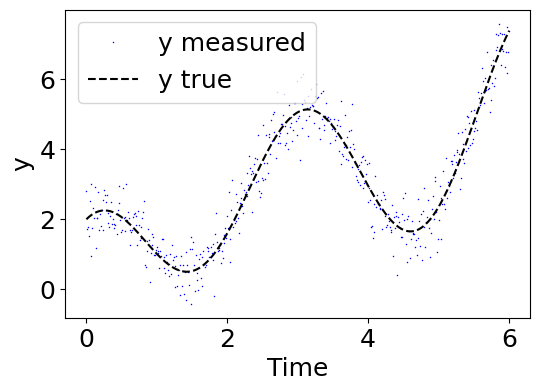

In [21]:
plot_tme(t, y, y_tilde)

# Candidate models

In [22]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T

# Exercise

Implement Linear Sequential Estimation, and plot the three parameters of $x$ over time

In [32]:
def update_estimate(h_k_plus_1, w_k, p_k_inv, y_tilde_k_plus_1, x_k):
  p_inverse_k_plus_1 = p_k_inv + h_k_plus_1.T @ (w_k @ h_k_plus_1)

  k_k_plus_1 = np.linalg.inv(p_inverse_k_plus_1) @ h_k_plus_1.T @ w_k

  x_k_plus_1 = x_k + k_k_plus_1 @ (y_tilde_k_plus_1 - h_k_plus_1 @ x_k )

  return p_inverse_k_plus_1, x_k_plus_1

In [48]:
p_k_inv = np.linalg.inv(np.identity(3) * 100)
w_k = np.identity(1)
x_k = np.vstack([.1, .1, .1])
x_est = [[], [], []]

for n_index, n_data in enumerate(model_1_H):
  y_tilde_k = y_tilde[n_index]
  h_k = np.atleast_2d(np.array(n_data))

  x_est[0].append(x_k[0][0])
  x_est[1].append(x_k[1][0])
  x_est[2].append(x_k[2][0])
  p_k_inv, x_k = update_estimate(h_k, w_k, p_k_inv, y_tilde_k, x_k)

<Axes: xlabel='Time', ylabel='y'>

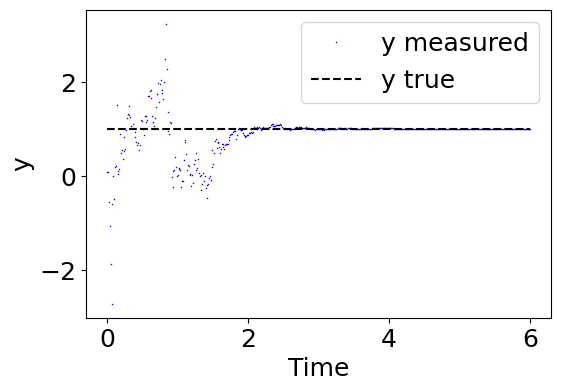

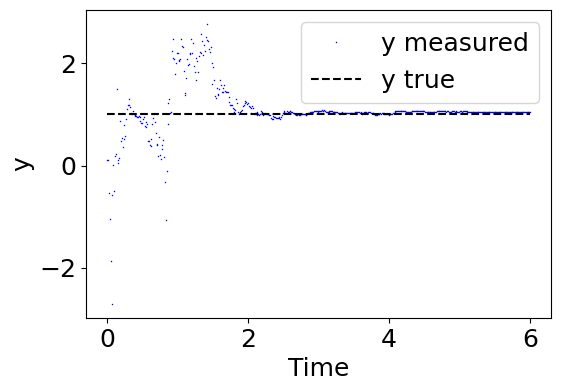

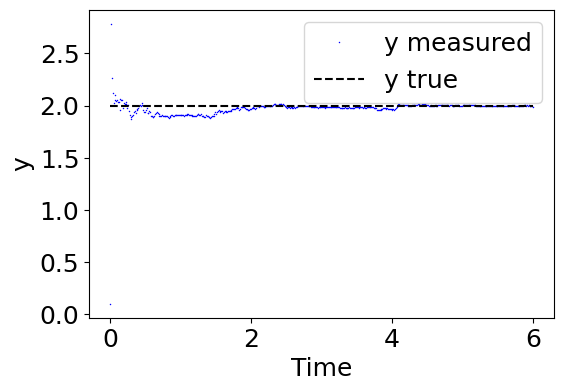

In [56]:
plot_tme(t, np.array([ x[0] for i in range(len(t))]), np.array(x_est[0]))
plot_tme(t, np.array([ x[1] for i in range(len(t))]), np.array(x_est[1]))
plot_tme(t, np.array([ x[2] for i in range(len(t))]), np.array(x_est[2]))
# plot_tme(t, x[1], x_est[1])
# plot_tme(t, x[2], x_est[2])